In [ ]:
# Question Instructions tasks are written as comment.
# Kindly write the code snippet below the tasks comment and generate the output.

# Logistic Regression with Python and Scikit-Learn


In this project, implement Logistic Regression with Python and Scikit-Learn.Build a classifier to predict whether or not it will rain tomorrow in Australia by training a binary classification model using Logistic Regression. Use the **Rain in Australia** dataset.

## Table of Contents


The table of contents for this project is as follows:-


1.	Introduction to Logistic Regression
2.	Logistic Regression intuition
3.	The problem statement
4.	Dataset description
5.	Import libraries
6.	Import dataset
7.	Exploratory data analysis
8.	Declare feature vector and target variable
9.	Split data into separate training and test set
10.	Feature engineering
11.	Feature scaling
12.	Model training
13.	Predict results
14.	Check accuracy score
15.	Confusion matrix
16.	Classification metrices
17.	Adjusting the threshold level
18.	ROC - AUC
19.	Recursive feature elimination
20.	k-Fold Cross Validation
21.	Hyperparameter optimization using GridSearch CV
22.	Results and conclusion



## 1. Introduction to Logistic Regression


When data scientists may come across a new classification problem, the first algorithm that may come across their mind is **Logistic Regression**. It is a supervised learning classification algorithm which is used to predict observations to a discrete set of classes. Practically, it is used to classify observations into different categories. Hence, its output is discrete in nature. **Logistic Regression** is also called **Logit Regression**. It is one of the most simple, straightforward and versatile classification algorithms which is used to solve classification problems.

## 2. Logistic Regression intuition


In statistics, the **Logistic Regression model** is a widely used statistical model which is primarily used for classification purposes. It means that given a set of observations, Logistic Regression algorithm helps us to classify these observations into two or more discrete classes. So, the target variable is discrete in nature.


Logistic Regression algorithm works by implementing a linear equation with independent or explanatory variables to predict a response value. This predicted response value, denoted by z is then converted into a probability value that lie between 0 and 1. We use the **sigmoid function** in order to map predicted values to probability values. This sigmoid function then maps any real value into a probability value between 0 and 1. 



The sigmoid function returns a probability value between 0 and 1. This probability value is then mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called **Decision boundary**. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.


Mathematically, it can be expressed as follows:-


                    p ≥ 0.5 => class = 1
    
                    p < 0.5 => class = 0 


Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this observation to class 1.  Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0.


We can use our knowledge of `sigmoid function` and `decision boundary` to write a prediction function. A prediction function in logistic regression returns the probability of the observation being positive, `Yes` or `True`. We call this as `class 1` and it is denoted by `P(class = 1)`. If the probability inches closer to one, then we will be more confident about our model that the observation is in class 1.

Logistic regression intuition is discussed in depth in the readme document.

## 3. The problem statement


In this project, I try to answer the question that whether or not it will rain tomorrow in Australia. I implement Logistic Regression with Python and Scikit-Learn. 


To answer the question, I build a classifier to predict whether or not it will rain tomorrow in Australia by training a binary classification model using Logistic Regression. I have used the **Rain in Australia** dataset downloaded from the Kaggle website for this project.

## 4. Dataset description


I have used the **Rain in Australia** data set downloaded from the Kaggle website.


I have downloaded this data set from the Kaggle website. The data set can be found at the following url:-


https://www.kaggle.com/jsphyg/weather-dataset-rattle-package


This dataset contains daily weather observations from numerous Australian weather stations. 

## 5. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings

warnings.filterwarnings('ignore')

## 6. Import dataset

In [ ]:
import pandas as pd
url="https://raw.githubusercontent.com/sameerCoder/Final-Data-science-Projects/main/Logistic%20regression/question2/weatherAUS.csv"
df=pd.read_csv(url)

## 7. Exploratory data analysis


Now, I will explore the data to gain insights about the data. 

In [ ]:
# view dimensions of dataset


(36881, 24)

We can see that there are 142193 instances and 24 variables in the data set.

In [ ]:
# preview the dataset


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0,No
1,7/3/2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0,No
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2,No
3,3/4/2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0,No
4,9/9/2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4,No


In [ ]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

### Drop  RISK_MM variable

It is given in the dataset description, that we should drop the `RISK_MM` feature variable from the dataset description. So, we 
should drop it as follows-

In [ ]:
# view summary of dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           36881 non-null  object 
 1   Location       36881 non-null  object 
 2   MinTemp        36543 non-null  float64
 3   MaxTemp        36639 non-null  float64
 4   Rainfall       36255 non-null  float64
 5   Evaporation    24035 non-null  float64
 6   Sunshine       23317 non-null  float64
 7   WindGustDir    33513 non-null  object 
 8   WindGustSpeed  33520 non-null  float64
 9   WindDir9am     34072 non-null  object 
 10  WindDir3pm     35919 non-null  object 
 11  WindSpeed9am   36219 non-null  float64
 12  WindSpeed3pm   36235 non-null  float64
 13  Humidity9am    36311 non-null  float64
 14  Humidity3pm    36370 non-null  float64
 15  Pressure9am    33309 non-null  float64
 16  Pressure3pm    33329 non-null  float64
 17  Cloud9am       24381 non-null  float64
 18  Cloud3

### Types of variables


In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.


First of all, I will find categorical variables.

In [ ]:
# find categorical variables



There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
# view the categorical variables



,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,5/18/2009,Hobart,NW,WSW,SSE,No,No
1,7/3/2009,Launceston,SSW,E,SW,No,No
2,2/18/2010,Williamtown,SSE,SSE,SSE,No,No
3,3/4/2010,PerthAirport,SW,SSE,SW,No,No
4,9/9/2010,GoldCoast,NNW,WNW,N,No,No


### Summary of categorical variables


- There is a date variable. It is denoted by `Date` column.


- There are 6 categorical variables. These are given by `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` and  `RainTomorrow`.


- There are two binary categorical variables - `RainToday` and  `RainTomorrow`.


- `RainTomorrow` is the target variable.

## Explore problems within categorical variables


First, I will explore the categorical variables.


### Missing values in categorical variables

In [ ]:
# check missing values in categorical variables


Date               0
Location           0
WindGustDir     3368
WindDir9am      2809
WindDir3pm       962
RainToday        626
RainTomorrow     620
dtype: int64

In [ ]:
# print categorical variables containing missing values



WindGustDir     3368
WindDir9am      2809
WindDir3pm       962
RainToday        626
RainTomorrow     620
dtype: int64


We can see that there are only 4 categorical variables in the dataset which contains missing values. These are `WindGustDir`, `WindDir9am`, `WindDir3pm` and `RainToday`.

### Frequency counts of categorical variables


Now, I will check the frequency counts of categorical variables.

In [ ]:
# view frequency of categorical variables


3/3/2009      42
7/9/2010      40
10/28/2011    40
5/24/2009     40
2/1/2010      40
              ..
12/3/2007      1
5/6/2008       1
12/15/2007     1
11/10/2007     1
11/23/2007     1
Name: Date, Length: 1473, dtype: int64
Canberra            1085
Sydney               971
Melbourne            904
Perth                899
Hobart               893
Adelaide             887
Brisbane             887
Darwin               881
Ballarat             813
Bendigo              811
Cairns               805
Albany               802
SydneyAirport        801
NorahHead            796
Albury               795
Launceston           795
Williamtown          794
Moree                793
MountGambier         793
AliceSprings         792
MountGinini          789
BadgerysCreek        788
Newcastle            782
Tuggeranong          782
Townsville           777
GoldCoast            777
MelbourneAirport     774
Mildura              769
Richmond             769
Walpole              768
Woomera              766

In [ ]:
# view frequency distribution of categorical variables


3/3/2009      0.001139
7/9/2010      0.001085
10/28/2011    0.001085
5/24/2009     0.001085
2/1/2010      0.001085
                ...   
12/3/2007     0.000027
5/6/2008      0.000027
12/15/2007    0.000027
11/10/2007    0.000027
11/23/2007    0.000027
Name: Date, Length: 1473, dtype: float64
Canberra            0.029419
Sydney              0.026328
Melbourne           0.024511
Perth               0.024376
Hobart              0.024213
Adelaide            0.024050
Brisbane            0.024050
Darwin              0.023888
Ballarat            0.022044
Bendigo             0.021990
Cairns              0.021827
Albany              0.021746
SydneyAirport       0.021719
NorahHead           0.021583
Albury              0.021556
Launceston          0.021556
Williamtown         0.021529
Moree               0.021502
MountGambier        0.021502
AliceSprings        0.021474
MountGinini         0.021393
BadgerysCreek       0.021366
Newcastle           0.021203
Tuggeranong         0.021203
Townsville

### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [ ]:
# check for cardinality in categorical variables


Date  contains  1473  labels
Location  contains  46  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels


We can see that there is a `Date` variable which needs to be preprocessed. I will do preprocessing in the following section.


All the other variables contain relatively smaller number of variables.

### Feature Engineering of Date Variable

In [ ]:
#CHECK dtypes

dtype('O')

We can see that the data type of `Date` variable is object. I will parse the date currently coded as object into datetime format.

In [ ]:
# parse the dates, currently coded as strings, into datetime format


In [ ]:
# extract year from date



0    2009
1    2009
2    2010
3    2010
4    2010
Name: Year, dtype: int64

In [ ]:
# extract month from date



0    5
1    7
2    2
3    3
4    9
Name: Month, dtype: int64

In [ ]:
# extract day from date



0    18
1     3
2    18
3     4
4     9
Name: Day, dtype: int64

In [ ]:
# again view the summary of dataset



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           36881 non-null  datetime64[ns]
 1   Location       36881 non-null  object        
 2   MinTemp        36543 non-null  float64       
 3   MaxTemp        36639 non-null  float64       
 4   Rainfall       36255 non-null  float64       
 5   Evaporation    24035 non-null  float64       
 6   Sunshine       23317 non-null  float64       
 7   WindGustDir    33513 non-null  object        
 8   WindGustSpeed  33520 non-null  float64       
 9   WindDir9am     34072 non-null  object        
 10  WindDir3pm     35919 non-null  object        
 11  WindSpeed9am   36219 non-null  float64       
 12  WindSpeed3pm   36235 non-null  float64       
 13  Humidity9am    36311 non-null  float64       
 14  Humidity3pm    36370 non-null  float64       
 15  Pressure9am    3330

We can see that there are three additional columns created from `Date` variable. Now, I will drop the original `Date` variable from the dataset.

In [ ]:
# drop the original Date variable



In [ ]:
# preview the dataset again

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,SSE,...,1022.2,1.0,1.0,9.1,13.3,No,No,2009,5,18
1,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,SW,...,1002.4,NaN,NaN,1.3,13.7,No,No,2009,7,3
2,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,SSE,...,1021.9,6.0,4.0,22.7,24.4,No,No,2010,2,18
3,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,SW,...,1014.9,6.0,1.0,20.0,26.1,No,No,2010,3,4
4,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,N,...,1015.0,NaN,NaN,22.2,22.6,No,No,2010,9,9


Now, we can see that the `Date` variable has been removed from the dataset.


### Explore Categorical Variables


Now, I will explore the categorical variables one by one. 

In [ ]:
# find categorical variables


There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


We can see that there are 6 categorical variables in the dataset. The `Date` variable has been removed. First, I will check missing values in categorical variables.

In [ ]:
# check for missing values in categorical variables 


Location           0
WindGustDir     3368
WindDir9am      2809
WindDir3pm       962
RainToday        626
RainTomorrow     620
dtype: int64

We can see that `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` variables contain missing values. I will explore these variables one by one.

### Explore `Location` variable

In [ ]:
# print number of labels in Location variable


Location contains 46 labels


In [ ]:
# check labels in location variable


array(['Hobart', 'Launceston', 'Williamtown', 'PerthAirport', 'GoldCoast',
       'Mildura', 'Nuriootpa', 'NorahHead', 'Townsville', 'MountGambier',
       'MelbourneAirport', 'SydneyAirport', 'Darwin', 'Newcastle',
       'Watsonia', 'Walpole', 'CoffsHarbour', 'MountGinini', 'Sale',
       'PearceRAAF', 'Adelaide', 'Albury', 'Richmond', 'Cairns',
       'BadgerysCreek', 'AliceSprings', 'Bendigo', 'SalmonGums',
       'Canberra', 'Ballarat', 'Witchcliffe', 'Woomera', 'Penrith',
       'WaggaWagga', 'Dartmoor', 'Perth', 'Cobar', 'Sydney', 'Melbourne',
       'NorfolkIsland', 'Tuggeranong', 'Albany', 'Moree', 'Wollongong',
       'Portland', 'Brisbane'], dtype=object)

In [ ]:
# check frequency distribution of values in Location variable


Canberra            1085
Sydney               971
Melbourne            904
Perth                899
Hobart               893
Adelaide             887
Brisbane             887
Darwin               881
Ballarat             813
Bendigo              811
Cairns               805
Albany               802
SydneyAirport        801
NorahHead            796
Albury               795
Launceston           795
Williamtown          794
Moree                793
MountGambier         793
AliceSprings         792
MountGinini          789
BadgerysCreek        788
Newcastle            782
Tuggeranong          782
Townsville           777
GoldCoast            777
MelbourneAirport     774
Mildura              769
Richmond             769
Walpole              768
Woomera              766
Witchcliffe          765
CoffsHarbour         765
Cobar                763
PearceRAAF           763
Portland             763
SalmonGums           759
Dartmoor             757
Nuriootpa            756
NorfolkIsland        756


In [ ]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,SydneyAirport,Townsville,Tuggeranong,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Explore `WindGustDir` variable

In [ ]:
# print number of labels in WindGustDir variable



WindGustDir contains 17 labels


In [ ]:
# check labels in WindGustDir variable



array(['NW', 'SSW', 'SSE', 'SW', 'NNW', 'N', 'SE', 'E', 'S', 'WSW', 'W',
       nan, 'NE', 'NNE', 'WNW', 'ESE', 'ENE'], dtype=object)

In [ ]:
# check frequency distribution of values in WindGustDir variable



SE     2403
W      2375
SSE    2330
N      2328
S      2317
SW     2272
E      2209
WSW    2206
SSW    2139
WNW    2052
ENE    2026
NW     1940
ESE    1894
NE     1769
NNE    1663
NNW    1590
Name: WindGustDir, dtype: int64

In [ ]:
#pandas.get_dummies() is used for data manipulation. 
#It converts categorical data into dummy or indicator variables.
import pandas as pd
 
con = pd.Series(list('abcba'))
print(pd.get_dummies(con))

   a  b  c
0  1  0  0
1  0  1  0
2  0  0  1
3  0  1  0
4  1  0  0


In [ ]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method



,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    2026
ESE    1894
N      2328
NE     1769
NNE    1663
NNW    1590
NW     1940
S      2317
SE     2403
SSE    2330
SSW    2139
SW     2272
W      2375
WNW    2052
WSW    2206
NaN    3368
dtype: int64

We can see that there are 9330 missing values in WindGustDir variable.

### Explore `WindDir9am` variable

In [ ]:
# print number of labels in WindDir9am variable


WindDir9am contains 17 labels


In [ ]:
# check labels in WindDir9am variable



array(['WSW', 'E', 'SSE', 'WNW', 'ENE', 'ESE', 'NW', nan, 'NE', 'SE',
       'NNW', 'N', 'W', 'NNE', 'S', 'SW', 'SSW'], dtype=object)

In [ ]:
# check frequency distribution of values in WindDir9am variable


N      2862
SE     2421
E      2375
SSE    2301
S      2233
W      2218
ENE    2090
SW     2085
NW     2077
NNE    2059
NNW    2017
NE     1941
SSW    1895
ESE    1864
WNW    1860
WSW    1774
Name: WindDir9am, dtype: int64

In [ ]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method



,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE    2090
ESE    1864
N      2862
NE     1941
NNE    2059
NNW    2017
NW     2077
S      2233
SE     2421
SSE    2301
SSW    1895
SW     2085
W      2218
WNW    1860
WSW    1774
NaN    2809
dtype: int64

We can see that there are 10013 missing values in the `WindDir9am` variable.

### Explore `WindDir3pm` variable

In [ ]:
# print number of labels in WindDir3pm variable



WindDir3pm contains 17 labels


In [ ]:
# check labels in WindDir3pm variable


array(['SSE', 'SW', 'N', 'NNE', 'S', 'E', 'W', 'SE', 'NW', nan, 'ESE',
       'NE', 'ENE', 'WSW', 'WNW', 'SSW', 'NNW'], dtype=object)

In [ ]:
# check frequency distribution of values in WindDir3pm variable



SE     2939
S      2547
W      2486
WSW    2410
SSE    2381
SW     2377
N      2278
E      2252
WNW    2208
NW     2178
ESE    2163
NE     2136
ENE    2063
SSW    1994
NNW    1860
NNE    1647
Name: WindDir3pm, dtype: int64

In [ ]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method



,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category



ENE    2063
ESE    2163
N      2278
NE     2136
NNE    1647
NNW    1860
NW     2178
S      2547
SE     2939
SSE    2381
SSW    1994
SW     2377
W      2486
WNW    2208
WSW    2410
NaN     962
dtype: int64

There are 3778 missing values in the `WindDir3pm` variable.

### Explore `RainToday` variable

In [ ]:
# print number of labels in RainToday variable


RainToday contains 3 labels


In [ ]:
# check labels in WindGustDir variable



array(['No', 'Yes', nan], dtype=object)

In [ ]:
# check frequency distribution of values in WindGustDir variable


No     27756
Yes     8499
Name: RainToday, dtype: int64

In [ ]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method



,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category



Yes    8499
NaN     626
dtype: int64

There are 1406 missing values in the `RainToday` variable.

### Explore Numerical Variables

In [ ]:
# find numerical variables



There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [ ]:
# view the numerical variables



,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,5.1,14.3,0.0,1.8,8.9,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,2009,5,18
1,1.1,14.5,0.4,NaN,NaN,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,2009,7,3
2,19.7,26.2,0.0,7.2,7.2,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,2010,2,18
3,16.6,28.0,0.0,9.0,11.3,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,2010,3,4
4,14.6,25.3,0.0,NaN,NaN,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,2010,9,9


### Summary of numerical variables


- There are 16 numerical variables. 


- These are given by `MinTemp`, `MaxTemp`, `Rainfall`, `Evaporation`, `Sunshine`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am` and `Temp3pm`.


- All of the numerical variables are of continuous type.

## Explore problems within numerical variables


Now, I will explore the numerical variables.


### Missing values in numerical variables

In [ ]:
# check missing values in numerical variables



MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustSpeed     3361
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
Year                 0
Month                0
Day                  0
dtype: int64

We can see that all the 16 numerical variables contain missing values.

### Outliers in numerical variables

In [ ]:
# view summary statistics in numerical variables



       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  36543.0  36639.0   36255.0      24035.0   23317.0        33520.0   
mean      12.0     23.0       3.0          5.0       8.0           40.0   
std        6.0      7.0       9.0          4.0       4.0           14.0   
min       -8.0     -3.0       0.0          0.0       0.0            7.0   
25%        8.0     18.0       0.0          3.0       5.0           31.0   
50%       12.0     22.0       0.0          5.0       8.0           39.0   
75%       17.0     28.0       1.0          7.0      11.0           48.0   
max       30.0     48.0     371.0         81.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count       36219.0       36235.0      36311.0      36370.0      33309.0   
mean           14.0          19.0         69.0         52.0       1017.0   
std             9.0           9.0         18.0         20.0          7.0   
min             0.0 

On closer inspection, we can see that the `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns may contain outliers.


I will draw boxplots to visualise outliers in the above variables. 

Text(0, 0.5, 'WindSpeed3pm')

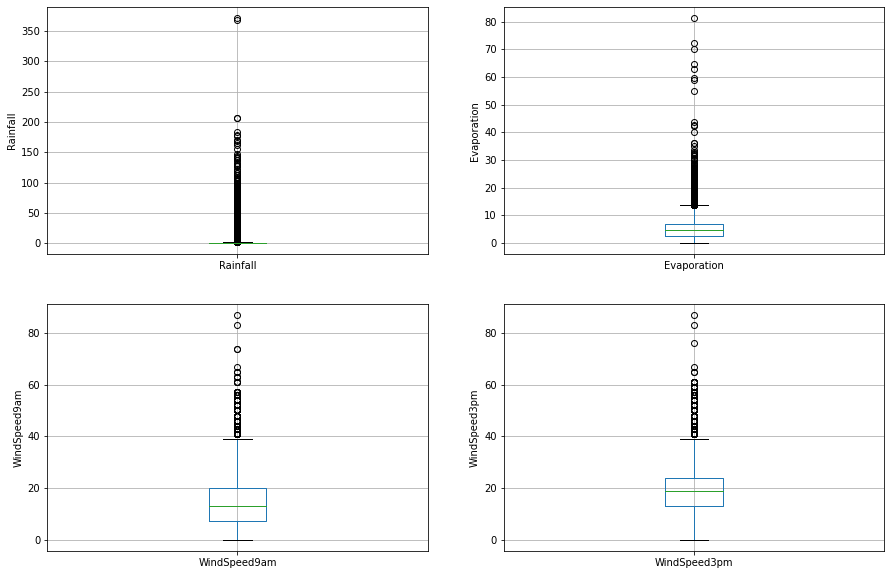

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

The above boxplots confirm that there are lot of outliers in these variables.

### Check the distribution of variables


Now, I will plot the histograms to check distributions to find out if they are normal or skewed. If the variable follows normal distribution, then I will do `Extreme Value Analysis` otherwise if they are skewed, I will find IQR (Interquantile range).

Text(0, 0.5, 'RainTomorrow')

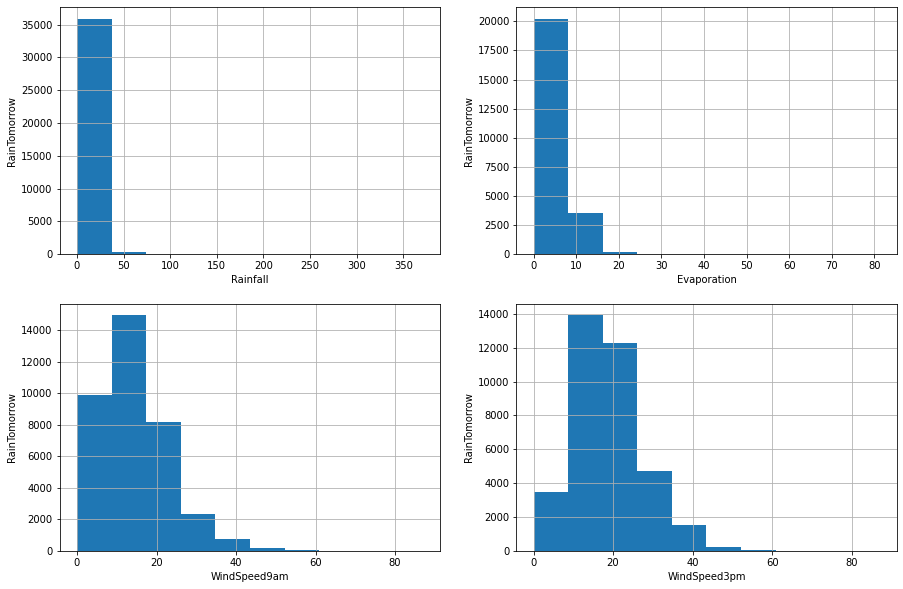

In [ ]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

We can see that all the four variables are skewed. So, I will use interquantile range to find outliers.

In [ ]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -2.4000000000000004 or > 3.2


For `Rainfall`, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

In [ ]:
# find outliers for Evaporation variable


Evaporation outliers are values < -10.600000000000001 or > 20.200000000000003


For `Evaporation`, the minimum and maximum values are 0.0 and 145.0. So, the outliers are values > 21.8.

In [ ]:
# find outliers for WindSpeed9am variable


WindSpeed9am outliers are values < -32.0 or > 59.0


For `WindSpeed9am`, the minimum and maximum values are 0.0 and 130.0. So, the outliers are values > 55.0.

In [ ]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed3pm outliers are values < -20.0 or > 57.0


For `WindSpeed3pm`, the minimum and maximum values are 0.0 and 87.0. So, the outliers are values > 57.0.

## 8. Declare feature vector and target variable

In [ ]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

## 9. Split data into separate training and test set

In [ ]:
# split X and y into training and testing sets




In [ ]:
# check the shape of X_train and X_test



((29504, 24), (7377, 24))

## 10. Feature Engineering


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will display the categorical and numerical variables again separately.

In [ ]:
# check data types in X_train


Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [ ]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
# display numerical variables


['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

### Engineering missing values in numerical variables



In [ ]:
# check missing values in numerical variables in X_train


MinTemp            269
MaxTemp            190
Rainfall           500
Evaporation      10284
Sunshine         10879
WindGustSpeed     2676
WindSpeed9am       524
WindSpeed3pm       524
Humidity9am        442
Humidity3pm        401
Pressure9am       2867
Pressure3pm       2862
Cloud9am         10026
Cloud3pm         10408
Temp9am            379
Temp3pm            350
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
# check missing values in numerical variables in X_test


MinTemp            69
MaxTemp            52
Rainfall          126
Evaporation      2562
Sunshine         2685
WindGustSpeed     685
WindSpeed9am      138
WindSpeed3pm      122
Humidity9am       128
Humidity3pm       110
Pressure9am       705
Pressure3pm       690
Cloud9am         2474
Cloud3pm         2574
Temp9am           108
Temp3pm            94
Year                0
Month               0
Day                 0
dtype: int64

In [ ]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0091
MaxTemp 0.0064
Rainfall 0.0169
Evaporation 0.3486
Sunshine 0.3687
WindGustSpeed 0.0907
WindSpeed9am 0.0178
WindSpeed3pm 0.0178
Humidity9am 0.015
Humidity3pm 0.0136
Pressure9am 0.0972
Pressure3pm 0.097
Cloud9am 0.3398
Cloud3pm 0.3528
Temp9am 0.0128
Temp3pm 0.0119


### Assumption


I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.


I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [ ]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)           
      

In [ ]:
# check again missing values in numerical variables in X_train


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
# check missing values in numerical variables in X_test


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

Now, we can see that there are no missing values in the numerical columns of training and test set.

### Engineering missing values in categorical variables

In [ ]:
# print percentage of missing values in the categorical variables in training set


Location       0.000000
WindGustDir    0.090869
WindDir9am     0.075515
WindDir3pm     0.026573
RainToday      0.016947
dtype: float64

In [ ]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.09086903470715835
WindDir9am 0.07551518438177875
WindDir3pm 0.026572668112798264
RainToday 0.016946854663774404


In [ ]:
# impute missing categorical variables with most frequent value

In [ ]:
# check missing values in categorical variables in X_train

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [ ]:
# check missing values in categorical variables in X_test


Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

As a final check, I will check for missing values in X_train and X_test.

In [ ]:
# check missing values in X_train


Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
# check missing values in X_test


Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

We can see that there are no missing values in X_train and X_test.

### Engineering outliers in numerical variables


We have seen that the `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns contain outliers. I will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [ ]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [ ]:
# Find xtrain  & xtest rainfall max value 
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

We can now see that the outliers in `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns are capped.

### Encode categorical variables

In [ ]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
# print all categorical data head

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
17784,Newcastle,W,N,SE,No
29428,Melbourne,SW,W,SW,No
33597,Albury,ENE,SE,ESE,Yes
25145,AliceSprings,SE,E,ESE,No
8107,Albury,SE,SE,S,No


In [ ]:
!pip install --upgrade category_encoders

In [ ]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
17784,Newcastle,17.7,25.0,0.0,4.6,8.3,W,39.0,N,SE,...,1015.0,6.0,6.0,20.5,24.0,0,1,2010,3,15
29428,Melbourne,19.1,24.0,0.0,2.2,1.0,SW,30.0,W,SW,...,1001.5,8.0,8.0,19.8,20.8,0,1,2011,3,22
33597,Albury,3.9,13.8,1.2,4.6,8.3,ENE,15.0,SE,ESE,...,1021.7,5.0,5.0,9.3,13.3,1,0,2011,8,15
25145,AliceSprings,17.6,33.8,0.2,15.2,10.1,SE,50.0,E,ESE,...,1010.1,5.0,4.0,26.1,32.6,0,1,2012,1,12
8107,Albury,4.6,19.0,0.0,4.6,8.3,SE,22.0,SE,S,...,1025.7,5.0,5.0,11.2,17.3,0,1,2009,10,10


We can see that two additional variables `RainToday_0` and `RainToday_1` are created from `RainToday` variable.

Now, I will create the `X_train` training set.

In [ ]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [ ]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
17784,17.7,25.0,0.0,4.6,8.3,39.0,0.0,4.0,81.0,65.0,...,0,0,0,1,0,0,0,0,0,0
29428,19.1,24.0,0.0,2.2,1.0,30.0,7.0,15.0,86.0,79.0,...,0,0,0,0,0,0,1,0,0,0
33597,3.9,13.8,1.2,4.6,8.3,15.0,6.0,7.0,86.0,73.0,...,0,0,0,0,0,0,0,0,0,0
25145,17.6,33.8,0.2,15.2,10.1,50.0,31.0,24.0,16.0,10.0,...,0,0,0,0,0,0,0,0,0,0
8107,4.6,19.0,0.0,4.6,8.3,22.0,17.0,9.0,55.0,36.0,...,0,0,1,0,0,0,0,0,0,0


Similarly, I will create the `X_test` testing set.

In [ ]:
# df concat as above done in x_train


In [ ]:
#print xtest head

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
33425,5.9,14.3,3.2,4.6,8.3,15.0,7.0,4.0,97.0,96.0,...,0,0,0,0,0,0,0,0,0,0
4685,23.5,28.2,3.2,4.6,0.0,33.0,13.0,13.0,91.0,84.0,...,0,0,0,0,0,0,0,0,0,0
21878,12.7,31.8,0.0,4.6,8.3,35.0,6.0,13.0,87.0,45.0,...,0,0,0,0,0,0,0,0,0,0
24568,2.4,12.4,0.0,4.6,8.3,39.0,13.0,19.0,93.0,53.0,...,0,0,0,1,0,0,0,0,0,0
34894,19.5,31.1,3.2,2.8,5.2,37.0,7.0,17.0,74.0,56.0,...,0,0,0,0,0,0,0,0,1,0


We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called `feature scaling`. I will do it as follows.

## 11. Feature Scaling

In [ ]:
#X_train describe

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,...,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,12.225129,22.941062,0.702867,4.957775,7.810548,40.272912,14.180789,18.870119,69.164351,52.363036,...,0.050569,0.059653,0.068838,0.106257,0.063788,0.052230,0.064398,0.067584,0.060161,0.064737
std,6.357184,6.957840,1.203053,2.841566,3.073407,12.926813,8.874938,8.682666,18.154728,20.212957,...,0.219120,0.236847,0.253183,0.308171,0.244379,0.222495,0.245465,0.251035,0.237790,0.246065
min,-8.500000,-3.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,17.800000,0.000000,3.600000,7.000000,31.000000,7.000000,13.000000,58.000000,38.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.100000,22.400000,0.000000,4.600000,8.300000,39.000000,13.000000,19.000000,70.000000,53.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,27.900000,0.800000,5.600000,9.400000,46.000000,19.000000,24.000000,83.000000,66.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.500000,48.100000,3.200000,21.800000,14.300000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# using MinMaxScaler to transform data 


In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
# create a datafram x_test  as like above x_train

In [ ]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,...,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.531414,0.508614,0.219646,0.227421,0.546192,0.259945,0.257833,0.331055,0.685351,0.518819,...,0.050569,0.059653,0.068838,0.106257,0.063788,0.052230,0.064398,0.067584,0.060161,0.064737
std,0.163005,0.135895,0.375954,0.130347,0.214924,0.100991,0.161363,0.152327,0.185252,0.204171,...,0.219120,0.236847,0.253183,0.308171,0.244379,0.222495,0.245465,0.251035,0.237790,0.246065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.415385,0.408203,0.000000,0.165138,0.489510,0.187500,0.127273,0.228070,0.571429,0.373737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.528205,0.498047,0.000000,0.211009,0.580420,0.250000,0.236364,0.333333,0.693878,0.525253,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.653846,0.605469,0.250000,0.256881,0.657343,0.304688,0.345455,0.421053,0.826531,0.656566,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We now have `X_train` dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

## 12. Model training

In [ ]:
#checking x_train null values

MinTemp        0
MaxTemp        0
Rainfall       0
Evaporation    0
Sunshine       0
              ..
SSW            0
SW             0
W              0
WNW            0
WSW            0
Length: 115, dtype: int64

In [ ]:
# drop the nan values from x_train

In [ ]:
#drop the nan value from y_train

17784     No
29428     No
33597     No
25145     No
8107      No
        ... 
20757     No
32103    Yes
30403     No
21243     No
2732      No
Name: RainTomorrow, Length: 28999, dtype: object

False

In [ ]:
#np.any(np.isnan(y_train))

In [ ]:
np.nan_to_num(X_train)

array([[0.67179487, 0.54882812, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.70769231, 0.52929688, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31794872, 0.33007812, 0.375     , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.49230769, 0.56445312, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.75897436, 0.5703125 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.65384615, 0.54101562, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
#fill the x_train nan value with mean value.

In [ ]:
y_train.head()
# fill the y_train nan value with mode 

In [ ]:
#np.any(np.isnan(X_train))
pd.isnull(y_train)
pd.isna(y_train)

17784    False
29428    False
33597    False
25145    False
8107     False
         ...  
20757    False
32103    False
30403    False
21243    False
2732     False
Name: RainTomorrow, Length: 29504, dtype: bool

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
#LogisticRegression(solver='liblinear', random_state=0)


# fit the model



ValueError: ignored

## 13. Predict results

In [ ]:
# predict the value from x_test


### predict_proba method


**predict_proba** method gives the probabilities for the target variable(0 and 1) in this case, in array form.

`0 is for probability of no rain` and `1 is for probability of rain.`

In [ ]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

In [ ]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

## 14. Check accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
# print the accuracy score of y_test, y_predicted

Here, **y_test** are the true class labels and **y_pred_test** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
y_pred_train = logreg.predict(X_train)

y_pred_train

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

### Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

The training-set accuracy score is 0.8476 while the test-set accuracy to be 0.8501. These two values are quite comparable. So, there is no question of overfitting. 


In Logistic Regression, we use default value of C = 1. It provides good performance with approximately 85% accuracy on both the training and the test set. But the model performance on both the training and test set are very comparable. It is likely the case of underfitting. 

I will increase C and fit a more flexible model.

In [ ]:
# fit the Logsitic Regression model with C=100

# instantiate the model
# parameter c=100 
# LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model

In [ ]:
# print the scores on training and test set



We can see that, C=100 results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

Now, I will investigate, what happens if we use more regularized model than the default value of C=1, by setting C=0.01.

In [ ]:
# fit the Logsitic Regression model with C=001

# instantiate the model
# keep now c=0.01
#LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model


In [ ]:
# print the scores on training and test set


So, if we use more regularized model by setting C=0.01, then both the training and test set accuracy decrease relatiev to the default parameters.

### Compare model accuracy with null accuracy


So, the model accuracy is 0.8501. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set. 

In [ ]:
# check class distribution in test set

y_test.value_counts()

We can see that the occurences of most frequent class is 22067. So, we can calculate null accuracy by dividing 22067 by total number of occurences.

In [ ]:
# check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

We can see that our model accuracy score is 0.8501 but null accuracy score is 0.7759. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

## 15. Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

#print 'Confusion matrix\n\n'

#print '\nTrue Positives(TP) = '

#print '\nTrue Negatives(TN) = '

#print '\nFalse Positives(FP) = '

#print '\nFalse Negatives(FN) = '

The confusion matrix shows `20892 + 3285 = 24177 correct predictions` and `3087 + 1175 = 4262 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 20892


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 3285


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 1175 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 3087 `(Type II error)`

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## 16. Classification metrices

### Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

### Classification accuracy

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


### Classification error

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


### Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP).`




In [ ]:
# print precision score


### Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, recall can be given as the ratio of `TP to (TP + FN).`





In [ ]:

#print 'Recall or Sensitivity :

### True Positive Rate


**True Positive Rate** is synonymous with **Recall**.


In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

### False Positive Rate

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

### Specificity

In [ ]:
#print specificity 


### f1-score


**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst 
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to 
compare classifier models, not global accuracy.



### Support


**Support** is the actual number of occurrences of the class in our dataset.

## 17. Adjusting the threshold level

In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

### Observations


- In each row, the numbers sum to 1.


- There are 2 columns which correspond to 2 classes - 0 and 1.

    - Class 0 - predicted probability that there is no rain tomorrow.    
    
    - Class 1 - predicted probability that there is rain tomorrow.
        
    
- Importance of predicted probabilities

    - We can rank the observations by probability of rain or no rain.


- predict_proba process

    - Predicts the probabilities    
    
    - Choose the class with the highest probability    
    
    
- Classification threshold level

    - There is a classification threshold level of 0.5.    
    
    - Class 1 - probability of rain is predicted if probability > 0.5.    
    
    - Class 0 - probability of no rain is predicted if probability < 0.5.    
    


In [ ]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

In [ ]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(X_test)[0:10, 1]

In [ ]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

In [ ]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

### Observations


- We can see that the above histogram is highly positive skewed.


- The first column tell us that there are approximately 15000 observations with probability between 0.0 and 0.1.


- There are small number of observations with probability > 0.5.


- So, these small number of observations predict that there will be rain tomorrow.


- Majority of observations predict that there will be no rain tomorrow.

### Lower the threshold

In [ ]:
from sklearn.preprocessing import binarize

for i in range(1,5):
    
    cm1=0
    
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, i/10)
    
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

### Comments


- In binary problems, the threshold of 0.5 is used by default to convert predicted probabilities into class predictions.


- Threshold can be adjusted to increase sensitivity or specificity. 


- Sensitivity and specificity have an inverse relationship. Increasing one would always decrease the other and vice versa.


- We can see that increasing the threshold level results in increased accuracy.


- Adjusting the threshold level should be one of the last step you do in the model-building process.

## 18. ROC - AUC



### ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN).`



**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN).`







In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).






In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve


ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

### ROC  AUC


**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

### Comments


- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

In [ ]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()



## Model evaluation and improvement



In this section, I will employ several techniques to improve the model performance. I will discuss 3 techniques which are used in practice for performance improvement. These are `recursive feature elimination`, `k-fold cross validation` and `hyperparameter optimization using GridSearchCV`.

## 19. Recursive Feature Elimination with Cross Validation


`Recursive feature elimination (RFE)` is a feature selection technique that helps us to select best features from the given number of features. At first, the model is built on all the given features. Then, it removes the least useful predictor and build the model again. This process is repeated until all the unimportant features are removed from the model.


`Recursive Feature Elimination with Cross-Validated (RFECV) feature selection` technique selects the best subset of features for the estimator by removing 0 to N features iteratively using recursive feature elimination. Then it selects the best subset based on the accuracy or cross-validation score or roc-auc of the model. Recursive feature elimination technique eliminates n features from a model by fitting the model multiple times and at each step, removing the weakest features.


I will use this technique to select best features from this model.

In [ ]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')

rfecv = rfecv.fit(X_train, y_train)

In [ ]:
#print "Optimal number of features :

In [ ]:
# transform the training data

X_train_rfecv = rfecv.transform(X_train)


# train classifier

logreg.fit(X_train_rfecv, y_train)

In [ ]:
# test classifier on test data

X_test_rfecv = rfecv.transform(X_test)

y_pred_rfecv = logreg.predict(X_test_rfecv)

In [ ]:
# print mean accuracy on transformed test data and labels

Our original model accuracy score is 0.8501 whereas accuracy score after RFECV is 0.8500. So, we can obtain approximately similar accuracy but with reduced or optimal set of features.

### Confusion-matrix revisited


I will again plot the confusion-matrix for this model to get an idea of errors our model is making.

In [ ]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_rfecv)

#print 'Confusion matrix\n\n'

#print '\nTrue Positives(TP1) = '

#print '\nTrue Negatives(TN1) = '

#print '\nFalse Positives(FP1) = '

#print '\nFalse Negatives(FN1) = '

We can see that in the original model, we have FP = 1175 whereas FP1 = 1174. So, we get approximately same number of false positives. Also, FN = 3087 whereas FN1 = 3091. So, we get slightly higher false negatives.

## 20. k-Fold Cross Validation

In [ ]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

#print 'Cross-validation scores

We can summarize the cross-validation accuracy by calculating its mean.

In [ ]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Our, original model score is found to be 0.8476. The average cross-validation score is 0.8474. So, we can conclude that cross-validation does not result in performance improvement.

## 21. Hyperparameter Optimization using GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = ____________________

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results


# print estimator that was chosen by the GridSearch


In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

### Comments


- Our original model test accuracy is 0.8501 while GridSearch CV accuracy is 0.8507.


- We can see that GridSearch CV improve the performance for this particular model.

## 22. Results and Conclusion

1.	The logistic regression model accuracy score is 0.8501. So, the model does a very good job in predicting whether or not it will rain tomorrow in Australia.

2.	Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.

3.	The model shows no signs of overfitting.

4.	Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

5.	Increasing the threshold level results in increased accuracy.

6.	ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

7.	Our original model accuracy score is 0.8501 whereas accuracy score after RFECV is 0.8500. So, we can obtain approximately similar accuracy but with reduced set of features.

8.	In the original model, we have FP = 1175 whereas FP1 = 1174. So, we get approximately same number of false positives. Also, FN = 3087 whereas FN1 = 3091. So, we get slighly higher false negatives.

9.	Our, original model score is found to be 0.8476. The average cross-validation score is 0.8474. So, we can conclude that cross-validation does not result in performance improvement.

10.	Our original model test accuracy is 0.8501 while GridSearch CV accuracy is 0.8507. We can see that GridSearch CV improve the performance for this particular model.
